## Problem Sheet #2

<br>
### Explicit <a href="https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods">Runge-Kutta</a> methods
<br>
#### The Explicit Euler method 
<br>

<b>Problem 1.</b> Let us consider the classical model for population dynamics.

Exponential growth (<a href="https://en.wikipedia.org/wiki/Malthusian_growth_model">Malthusian growth model</a>, 1798)

\begin{cases}
N'(t)= kN(t)&\\
N(0)=N_0, &
\end{cases}

where $k\in\mathbb{R}$ is the growth rate and $N(t)$ is the size of the population at time $t$.

<br>
Write an explicit Euler code for the Malthusian growth model. Let us compare the numerical solution with the analytical one for different values of $k, N_0$ and $t\in[0,T]$. What can we experience?

err =  0.56621


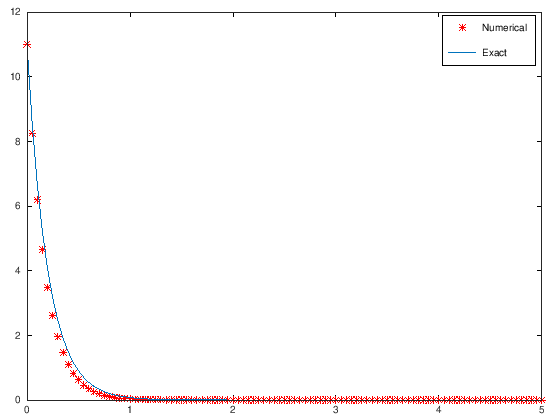

In [8]:
T=5; N_0=11; k=-5;
N=100;
h=T/N;
%%Lambda from the test problem
%Attention: conditional_h=-2/k

t_n=0:h:T;
y=zeros(size(t_n));
y(1)=N_0;
%% EE
for i=1:N
    y(i+1)=y(i)+h*k*y(i);
end
%Plotting the exact solution and numerical solution on the same figure
exact=exp(k*t_n)*N_0;
plot(t_n,y,'r*')
hold on
plot(t_n,exact)
hold off
legend('Numerical','Exact')
err=norm(y-exact,'inf')

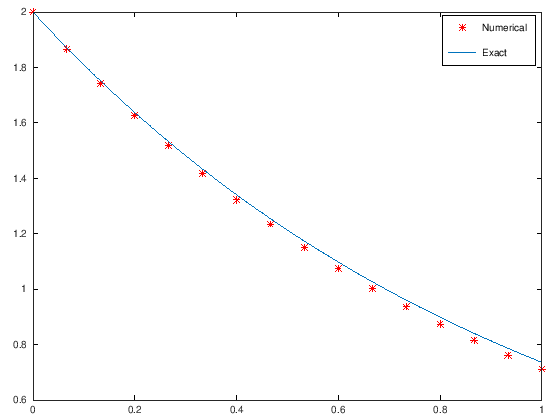

In [11]:
% Write an elegant and general Explicit Euler code
% and apply to this Malthusian growth model

<br>

<b>Problem 2.</b> Let us consider another classical model for population dynamics.

Logistic growth (<a href="https://en.wikipedia.org/wiki/Pierre_Fran%C3%A7ois_Verhulst">Verhulstian growth model</a>, 1838)

\begin{cases}
N'(t)= rN(t)\bigg(1-\dfrac{N(t)}{K}\bigg)&\\
N(0)=N_0, &
\end{cases}

where $r\in\mathbb{R}^+$ is the qrowth rate, $K\in\mathbb{R}^+$ is the carrying capacity rate and $N(t)>0$ is the size of the population at time $t$.

Modify appropriately your previously written Explicit Euler code to this case. Use the following parameters modeling the 10 day-long growth of a beanstalk:

+ $K=83.4772$ 
+ $r=0.977361$
+ $N_0=1.53008$
<br>

Make a plot and compare your results with the measured data:
<a href="http://www.tankonyvtar.hu/hu/tartalom/tamop425/0038_informatika_Geda_Gabor-Modellezes_es_szimulacio_az_oktatasban/ch04s02.html">(a Hungarian source link)</a>.

<img src="babszar.png" width="350">



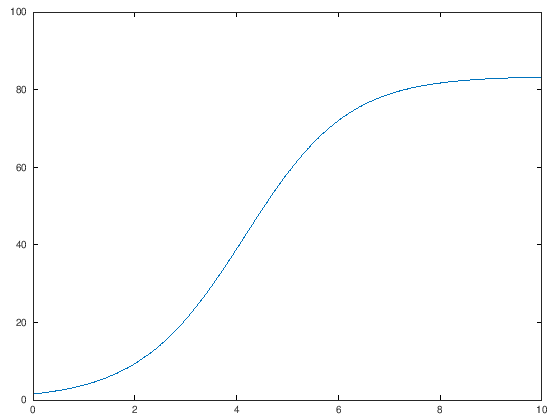

In [12]:
% Type your commands generating the required plot based on the modified Explicit Euler code


<br>
#### The Improved Euler (Runge2) method
Remark: <a href="https://en.wikipedia.org/wiki/Heun%27s_method">About similar methods</a>

<br>
<b>Problem 3.</b> Let us consider the IVP

\begin{cases}
x'(t)= x(t)+t&\\
x(0)=2, &
\end{cases}

where $t\in [0,1]$. <br>

Calculate the numerical solution by hand using the improved Euler method with step-size $h=1/2$. Write a code which solves the above IVP using the improved Euler method. Let us make a table halfing the step-size and measuring the global error in the maximum norm. What can we expreience?

In [1]:
[h, t, y]=improvedeuler(0,1,2,16);
format long
exact=3*exp(t)-t-1;
norm(exact-y,'inf')

ans =  0.00506491795283459


<b>Problem 4.</b> [Extra] Calculate the order of consistency for the improved Euler method. (Hint: multivariable Taylor expansion)
<br><br>

<b>Problem 5.</b> Calculate the stability function of the learned RK2 method. Is it an A-stable method?


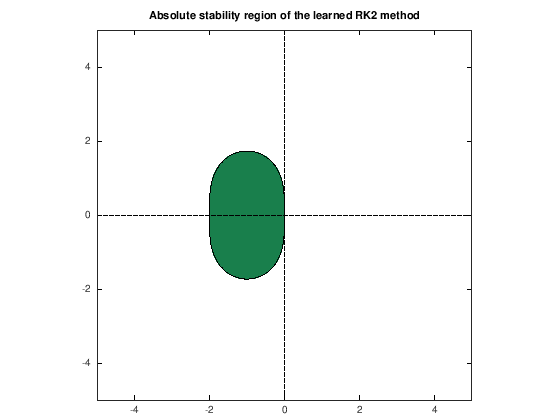

#### Applications of RK3 and RK4 
<br>
RK3 (Heun, 1900)<br>
$k_1=f(t_n,y_n)$<br>
$k_2=f\left(t_n+\frac{1}{3}h,y_n+\frac{1}{3}hk_1\right)$<br>
$k_3=f\left(t_n+\frac{2}{3}h,y_n+\frac{2}{3}hk_2\right)$<br>
$y_{n+1}=y_n+h\left(\frac{1}{4}k_1+\frac{3}{4}k_3\right)$
<br>
<br>

RK4 (Runge, 1901)<br>
$k_1=f(t_n,y_n)$<br>
$k_2=f\left(t_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_1\right)$<br>
$k_3=f\left(t_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_2\right)$<br>
$k_4=f\left(t_n+h,y_n+hk_3\right)$<br>
$y_{n+1}=y_n+h\left(\frac{1}{6}k_1+\frac{1}{3}k_2+\frac{1}{3}k_3+\frac{1}{6}k_4\right)$
<br>
<br>

<b>Problem 6.</b> [Assignment]

The motion of a failing body is described by Newton's second law $F=ma$. Empricial studies suggest that air resistance can be modeled as

$$F=kv^p,$$

where $1\leq p\leq 2$ and constant $k$ depends on the size and the shape of the body as well as the density and the viscosity of the air. Well-known cases:

+ $p=1$: relatively slow velocity
+ $p=2$: relatively high velocity

Let us consider the latter case, i.e. when resistance is proportional to the square of the velocity. Taking a body moving downward we have the equation

$$v'(t)=rv^2(t)-g,$$

where $r=\frac{k}{m}$ is the drag coefficient and $g=9.81\ m/s^2$ is the gravitational acceleration. A typical drag coefficient for a parachutist is $1.6$. Write the classical RK4 method's code (let's see above) and apply to this parachutist falling problem.<br>

Compare the numerical solution with the analytical one on time interval $t\in [0,1]$ with initial velocity value $v(0)=1$ halfing the step-size. Measure the global error vector in maximum norm and make a table using these values. What can we exprecience halfing the step-size?
<br>
<br>

<b>Problem 7.</b> [Assignment]

Let us apply the above mentioned RK3 and RK4 methods to the Deahlquist test equation. Calculate their stability functions and plot their stability regions in a figure. Are these A-stable methods?